# TASK #1: IMPORT LIBRARIES AND DATASETS

In [2]:
!pip install jupyterthemes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme

In [2]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# TASK #2: PERFORM EXPLORATORY DATA ANALYSIS - PART 1

<AxesSubplot:>

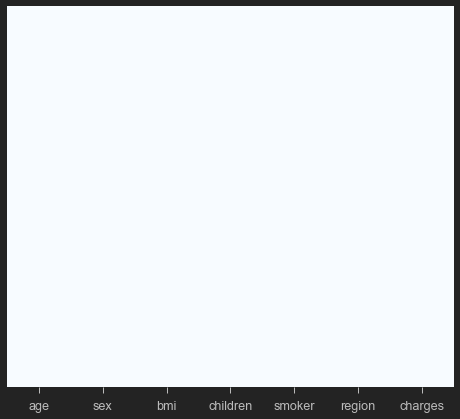

In [4]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<AxesSubplot:>

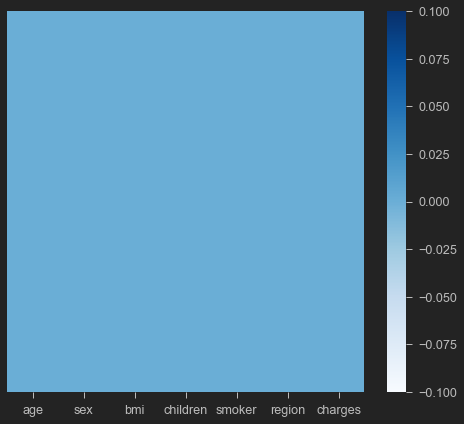

In [5]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = True, cmap="Blues")

<AxesSubplot:>

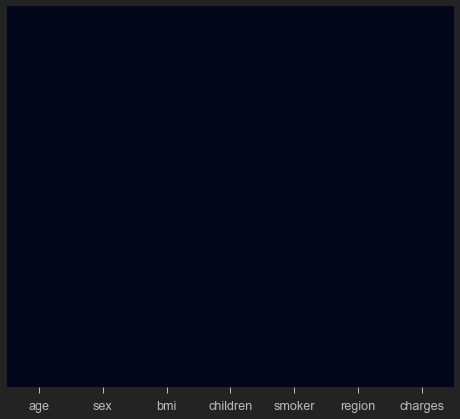

In [6]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False)

In [7]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
insurance_df.groupby(by = ['region']).mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [11]:
insurance_df.groupby(by = ['region'])['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [12]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
insurance_df.groupby(by = ['region']).mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [13]:
insurance_df.groupby(by="age").mean()

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# TASK #3: PERFORM FEATURE ENGINEERING

In [23]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# convert categorical variable to numerical
insurance_df['sex'].replace(['female', 'male'],[0,1], inplace=True)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [16]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [21]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [22]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [23]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [24]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [25]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# TASK #4: PERFORM DATA VISUALIZATION

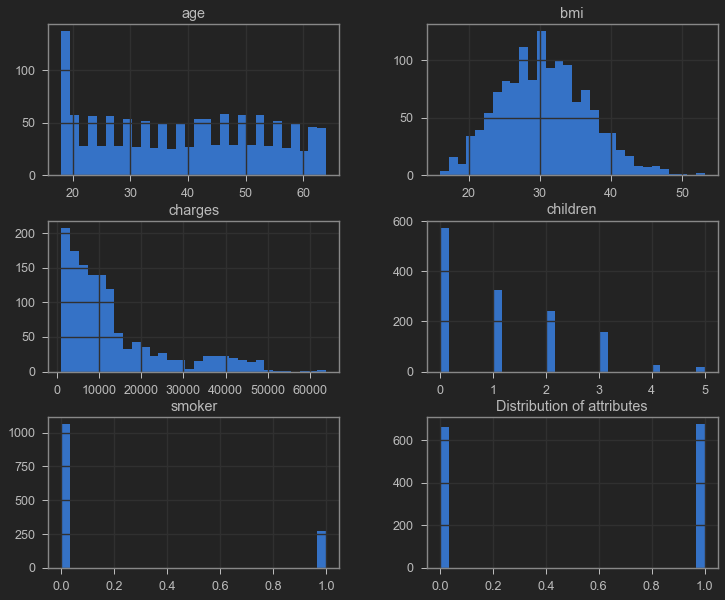

In [26]:
insurance_df[['age', 'bmi', 'charges', 'children', 'smoker', 'sex']].hist(figsize=(12,10), bins=30)
plt.title('Distribution of attributes')
plt.show()

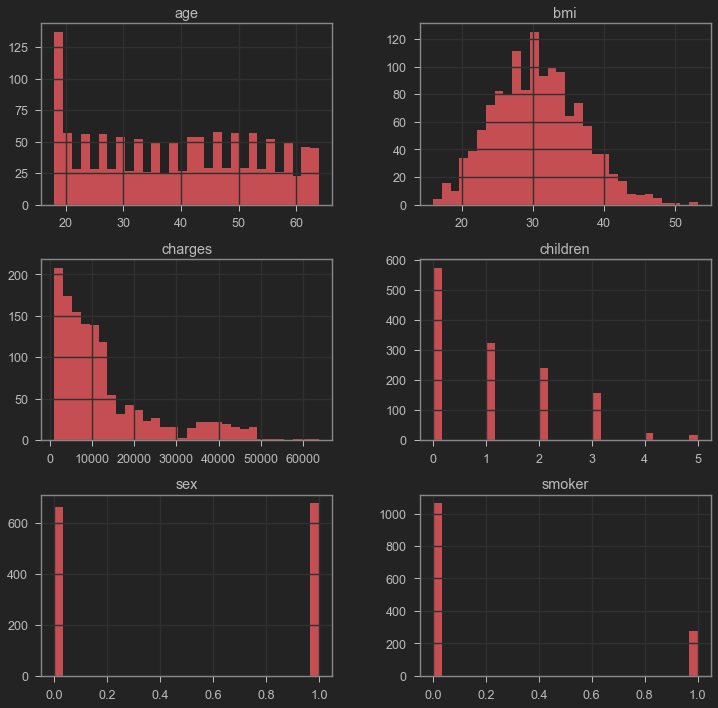

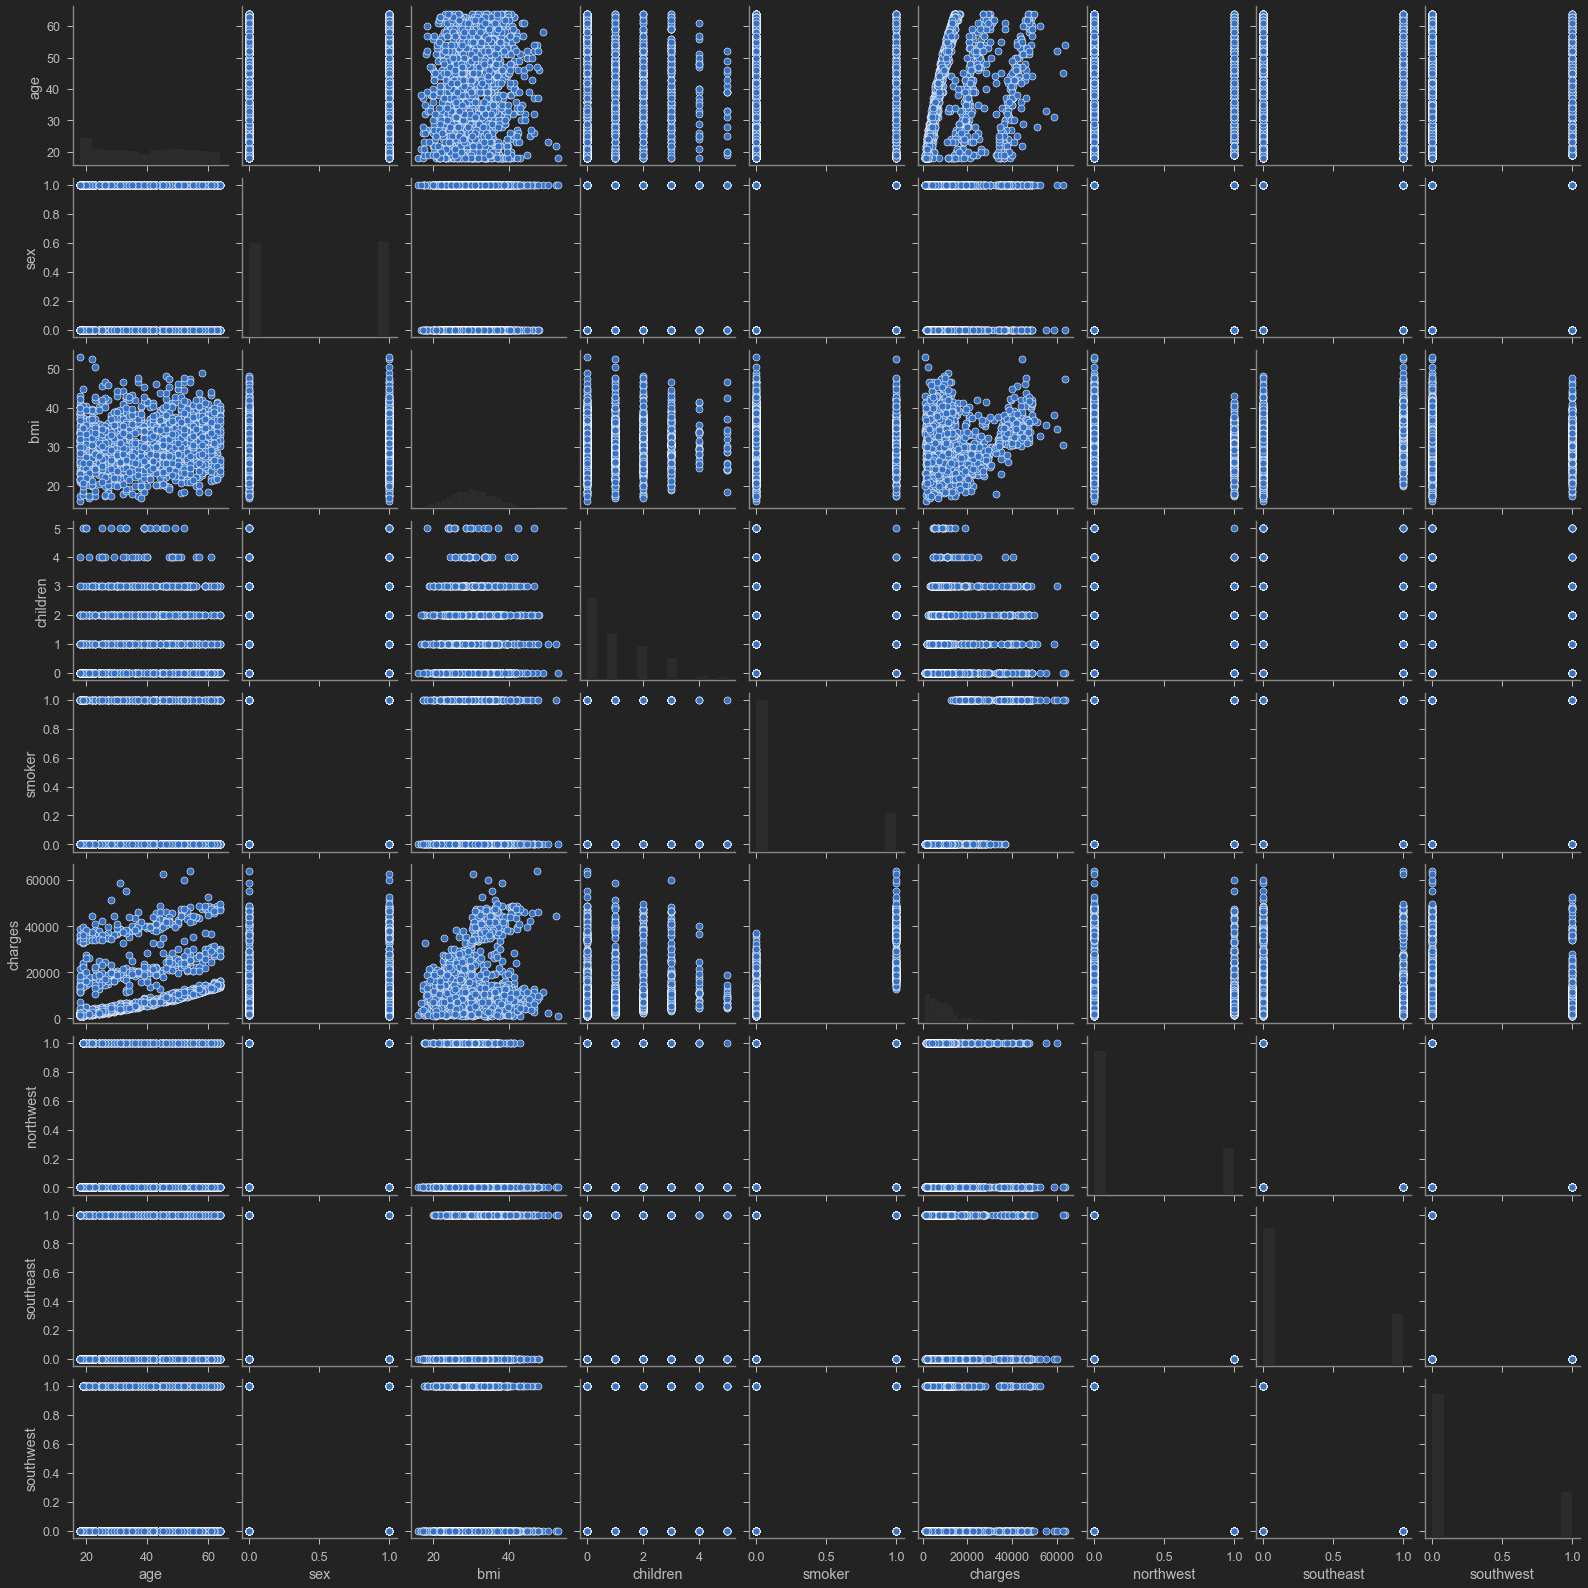

In [27]:
# plot pairplot
sns.pairplot(insurance_df)
plt.show()

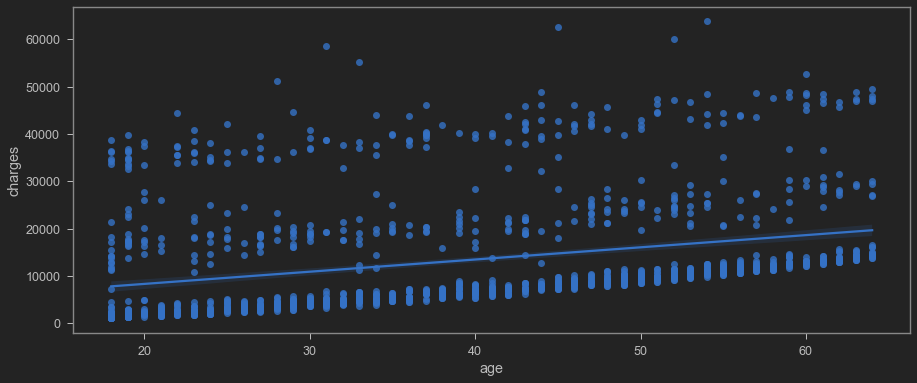

In [28]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

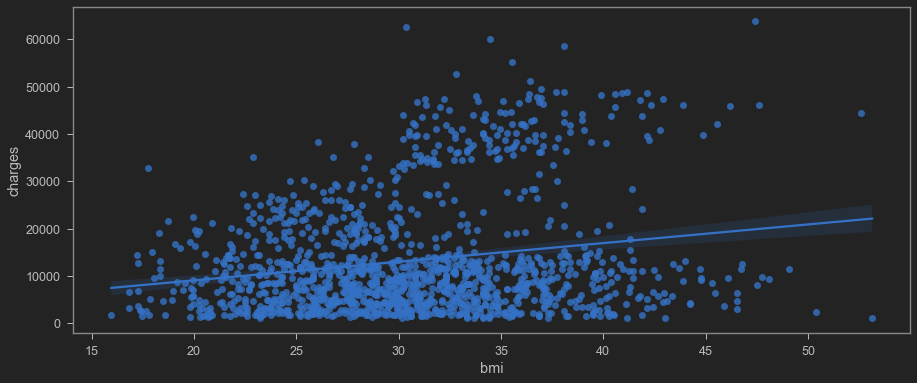

In [29]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

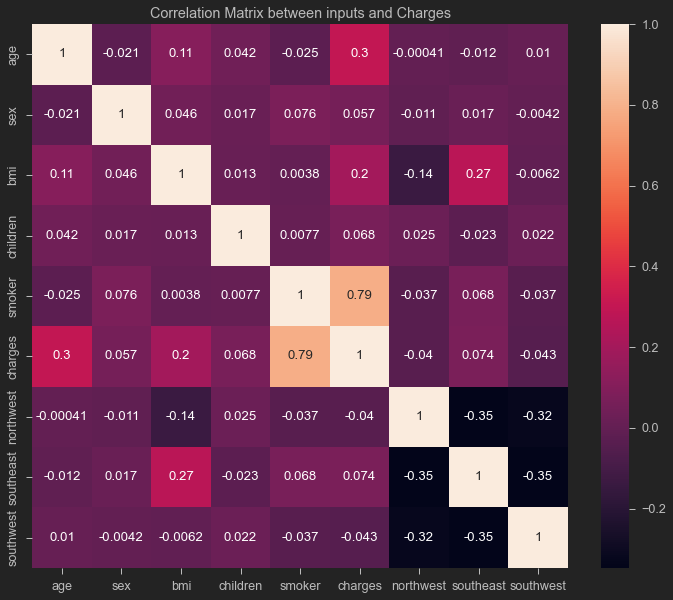

In [30]:
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix between inputs and Charges')
sns.heatmap(insurance_df.corr(), annot=True)
plt.show()

- It is evident from the above correlation matrix that smoking habit has a strong positive correlation with Charges

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [31]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [32]:
y = insurance_df['charges']

In [33]:
X = insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'northwest', 'southeast', 'southwest']]

In [34]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [35]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
X.shape

(1338, 8)

In [37]:
y.shape

(1338,)

In [38]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [39]:
y = y.reshape(-1,1)

In [40]:
y.shape

(1338, 1)

In [41]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [42]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Training shape X: ', X_train.shape)
print('Test shape X: ', X_test.shape)
print('Training shape y: ', y_train.shape)
print('Test shape y: ', y_test.shape)

Training shape X:  (1070, 8)
Test shape X:  (268, 8)
Training shape y:  (1070, 1)
Test shape y:  (268, 1)


# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [46]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [47]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929734342766

In [48]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [49]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [50]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5796.284 
MSE = 33596910.0 
MAE = 4181.195 
R2 = 0.7835929919137153 
Adjusted R2 = 0.7769086055635599


# RandomForestRegression

In [55]:
y_train_rf = y_train.ravel()
y_train_rf.shape

(1070,)

In [56]:
y_test_rf = y_test.ravel()
y_test_rf.shape

(268,)

In [57]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor()
RFModel.fit(X_train, y_train_rf)

RFModel_accuracy = RFModel.score(X_test, y_test_rf)
RFModel_accuracy

0.8665474601977006

In [74]:
y_predict_rf = RFModel.predict(X_test)
y_predict_rf_orig = scaler_y.inverse_transform(y_predict_rf)

RMSE_rf = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_rf_orig)),'.3f'))
MSE_rf = mean_squared_error(y_test_orig, y_predict_rf_orig)
MAE_rf = mean_absolute_error(y_test_orig, y_predict_rf_orig)
r2_rf = r2_score(y_test_orig, y_predict_rf_orig)
adj_r2_rf = 1-(1-r2_rf)*(n-1)/(n-k-1)

print('RMSE =',RMSE_rf, '\nMSE =',MSE_rf, '\nMAE =',MAE_rf, '\nR2 =', r2_rf, '\nAdjusted R2 =', adj_r2_rf) 

RMSE = 4551.74 
MSE = 20718337.041429706 
MAE = 2544.0790266486356 
R2 = 0.8665474674707435 
Adjusted R2 = 0.8624253815238939


# RandomForestRegression with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs = -1, verbose = 2)

param_grid={'n_estimators':[60,50,55],'criterion':['mse','mae'],'max_depth':[7],'min_samples_split':[3],'max_features':['auto']}
gs=GridSearchCV(reg,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [66]:
gs.fit(X_train, y_train_rf)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
building tree 1 of 55building tree 2 of 55building tree 3 of 55


building tree 4 of 55building tree 5 of 55
building tree 6 of 55

building tree 7 of 55
building tree 8 of 55
building tree 9 of 55building tree 10 of 55

building tree 11 of 55
building tree 12 of 55
building tree 13 of 55building tree 14 of 55

building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
buildi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  55 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [7],
                         'max_features': ['auto'], 'min_samples_split': [3],
                         'n_estimators': [60, 50, 55]},
             verbose=1)

In [67]:
gs.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 55}

In [69]:
gs.best_score_

0.8392316775311124

In [70]:
predicted_y=gs.predict(X_test)
r2_score(y_test,predicted_y)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  52 out of  55 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  55 out of  55 | elapsed:    0.0s finished


0.874400839427808

# XGBoost

In [95]:
!pip install xgboost

In [96]:
from xgboost import XGBRegressor,XGBRFRegressor

In [97]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
xgr_accuracy = xgr.score(X_test, y_test_rf)
xgr_accuracy

0.8243893407452343

In [101]:
xgrfr = XGBRFRegressor()
xgrfr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [102]:
xgrfr_accuracy = xgrfr.score(X_test, y_test_rf)
xgrfr_accuracy

0.8737094953769808

In [104]:
xgrfr_gs = XGBRFRegressor()

In [105]:
param_grid={'n_estimators':[60,50,55],'criterion':['mse','mae'],'max_depth':[7],'min_samples_split':[3],'max_features':['auto']}
gs=GridSearchCV(xgrfr_gs,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [106]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[22:25:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "max_features", "min_samples_split" } are not used.



GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
           

In [107]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 50}

In [108]:
gs.best_score_

0.8350286884535233

In [109]:
predicted_y=gs.predict(X_test)
r2_score(y_test,predicted_y)

0.8741527345589946

In [113]:
y_predict_xgrf = gs.predict(X_test)
y_predict_xgrf_orig = scaler_y.inverse_transform(y_predict_xgrf)

RMSE_xgrf = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_xgrf_orig)),'.3f'))
MSE_xgrf = mean_squared_error(y_test_orig, y_predict_xgrf_orig)
MAE_xgrf = mean_absolute_error(y_test_orig, y_predict_xgrf_orig)
r2_xgrf = r2_score(y_test_orig, y_predict_xgrf_orig)
adj_r2_xgrf = 1-(1-r2_xgrf)*(n-1)/(n-k-1)

print('RMSE =',RMSE_xgrf, '\nMSE =',MSE_xgrf, '\nMAE =',MAE_xgrf, '\nR2 =', r2_xgrf, '\nAdjusted R2 =', adj_r2_xgrf) 

RMSE = 4420.139 
MSE = 19537630.0 
MAE = 2477.2163 
R2 = 0.8741527369309153 
Adjusted R2 = 0.8702655627820632


# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [72]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [79]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.0456 - val_loss: 0.0487
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.0396
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0428
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.0415
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0481
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.0460
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.0476
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.0539
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.0567
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.0517
Epoch 11/

43/43 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.1262
Epoch 84/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.1298
Epoch 85/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0243 - val_loss: 0.1161
Epoch 86/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.1266
Epoch 87/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.1339
Epoch 88/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1354
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.1289
Epoch 90/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.1286
Epoch 91/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.1254
Epoch 92/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.1289
Epoch 93/100


In [80]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2274
Accuracy : 0.7725796699523926


In [81]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

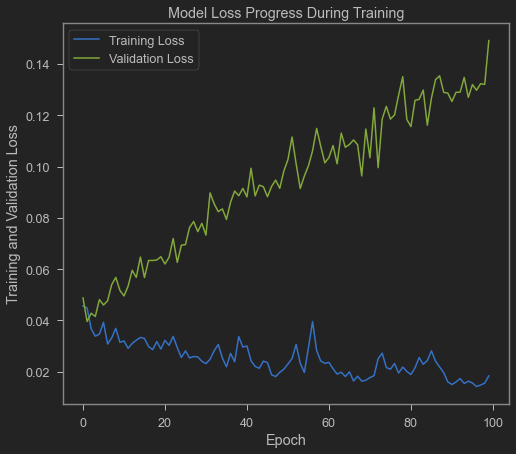

In [82]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

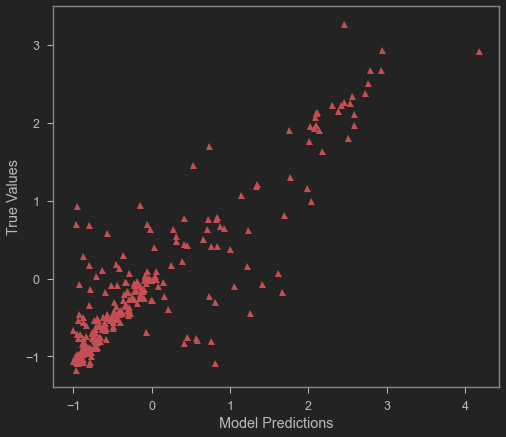

In [83]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [84]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

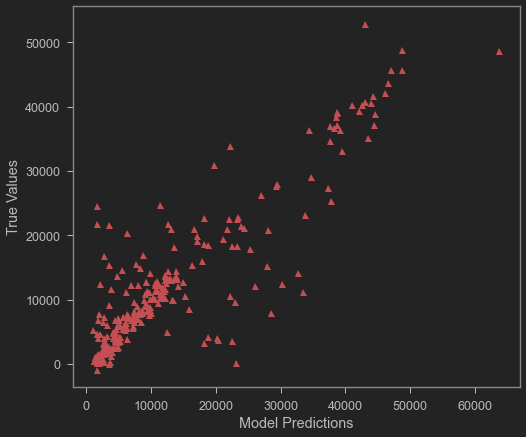

In [85]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [86]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5772.937 
MSE = 33326802.0 
MAE = 3321.6567 
R2 = 0.7853328545925985 
Adjusted R2 = 0.7787022091746093


### ADDING "Dropout" IN THE MODEL

In [87]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                450       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)              

In [88]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.6578 - val_loss: 0.2879
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.3986 - val_loss: 0.2190
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.3200 - val_loss: 0.2133
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2748 - val_loss: 0.1747
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2803 - val_loss: 0.2128
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2256 - val_loss: 0.1815
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2513 - val_loss: 0.1711
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2517 - val_loss: 0.1957
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2426 - val_loss: 0.1922
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2134 - val_loss: 0.1760
Epoch 11/

43/43 [==============================] - 0s 2ms/step - loss: 0.1478 - val_loss: 0.1463
Epoch 84/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1676
Epoch 85/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1401 - val_loss: 0.1499
Epoch 86/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1473 - val_loss: 0.1517
Epoch 87/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1466
Epoch 88/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.1538
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.1600
Epoch 90/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1518
Epoch 91/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1461 - val_loss: 0.1550
Epoch 92/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1532
Epoch 93/100


In [89]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.1677
Accuracy : 0.8322759717702866


9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

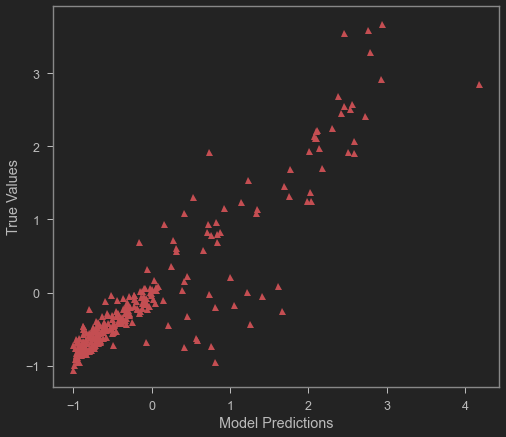

In [90]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [91]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [92]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4957.695 
MSE = 24578740.0 
MAE = 2895.4897 
R2 = 0.8416815393091398 
Adjusted R2 = 0.836791393805175
